In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
UNSAM_LC = "IQM_UNSAM_LC.csv"
JUK = "IQM_JUK.csv"
RRIB = "IQM_RRIB.csv"
ADNI="IQM_ADNI.csv"

# boxplot de cnr y efc para cada dataset
iqm_unsam = pd.read_csv(UNSAM_LC)
iqm_juk = pd.read_csv(JUK)
iqm_rrib = pd.read_csv(RRIB)
iqm_adni = pd.read_csv(ADNI)

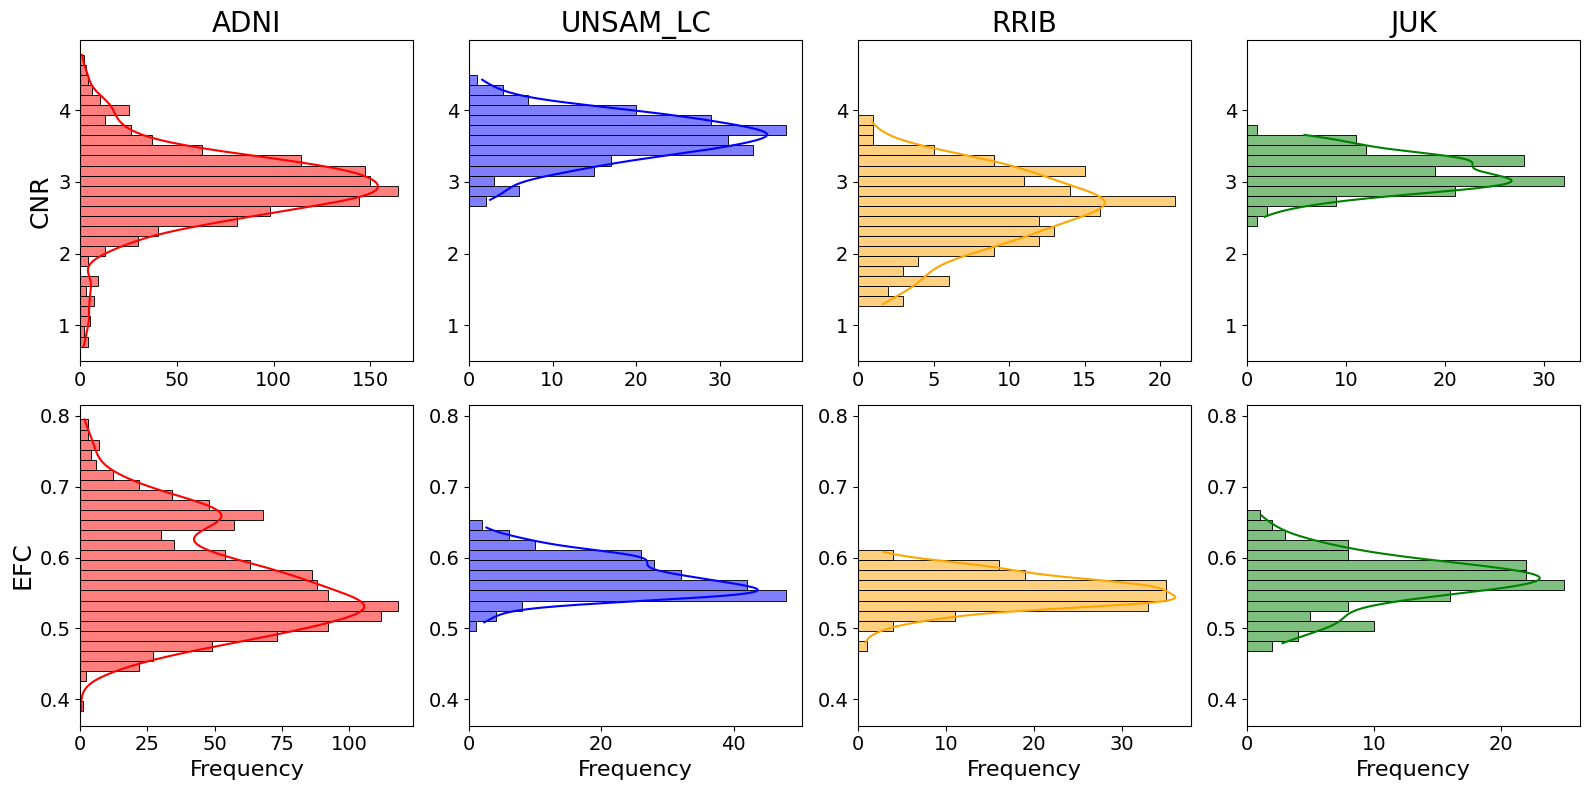

In [3]:
# Unir todos los valores de cnr y efc para calcular bins comunes
all_cnr = np.concatenate([
    iqm_adni['cnr'],
    iqm_unsam['cnr'],
    iqm_rrib['cnr'],
    iqm_juk['cnr']
])

all_efc = np.concatenate([
    iqm_adni['efc'],
    iqm_unsam['efc'],
    iqm_rrib['efc'],
    iqm_juk['efc']
])

# Definir número de bins (podés cambiarlo)
num_bins = 30

# Crear bins iguales para todos
cnr_bins = np.linspace(all_cnr.min(), all_cnr.max(), num_bins)
efc_bins = np.linspace(all_efc.min(), all_efc.max(), num_bins)

# =========================
#     PLOT CON BINS IGUALES
# =========================

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# --- ADNI ---
sns.histplot(data=iqm_adni, y='cnr', ax=axes[0, 0], kde=True, bins=cnr_bins, color='red')
axes[0, 0].set_title('ADNI', fontsize=20)
sns.histplot(data=iqm_adni, y='efc', ax=axes[1, 0], kde=True, bins=efc_bins, color='red')
axes[0, 0].set_xlabel('')             
axes[1, 0].set_xlabel('Frequency',fontsize=16)             
axes[1, 0].set_ylabel('EFC', fontsize=18)      
axes[0, 0].set_ylabel('CNR', fontsize=18)      

# --- UNSAM ---
sns.histplot(data=iqm_unsam, y='cnr', ax=axes[0, 1], kde=True, bins=cnr_bins, color='blue')
axes[0, 1].set_title('UNSAM_LC', fontsize=20)
sns.histplot(data=iqm_unsam, y='efc', ax=axes[1, 1], kde=True, bins=efc_bins, color='blue')
axes[0, 1].set_xlabel('')
axes[1, 1].set_xlabel('Frequency',fontsize=16)
axes[1, 1].set_ylabel('')
axes[0, 1].set_ylabel('')

# --- RRIB ---
sns.histplot(data=iqm_rrib, y='cnr', ax=axes[0, 2], kde=True, bins=cnr_bins, color='orange')
axes[0, 2].set_title('RRIB', fontsize=20)
sns.histplot(data=iqm_rrib, y='efc', ax=axes[1, 2], kde=True, bins=efc_bins, color='orange')
axes[0, 2].set_xlabel('')
axes[1, 2].set_xlabel('Frequency',fontsize=16)
axes[1, 2].set_ylabel('')
axes[0, 2].set_ylabel('')

# --- JUK ---
sns.histplot(data=iqm_juk, y='cnr', ax=axes[0, 3], kde=True, bins=cnr_bins, color='green')
axes[0, 3].set_title('JUK', fontsize=20)
sns.histplot(data=iqm_juk, y='efc', ax=axes[1, 3], kde=True, bins=efc_bins, color='green')
axes[0, 3].set_xlabel('')
axes[1, 3].set_xlabel('Frequency',fontsize=16)
axes[1, 3].set_ylabel('')
axes[0, 3].set_ylabel('')

#aumentar el tamaño de los ticks
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

In [5]:
# Calcular media y desviación estándar para CNR y EFC de cada dataset
print("=" * 60)
print("CNR - Media y Desviación Estándar")
print("=" * 60)
print(f"ADNI:    Mean = {iqm_adni['cnr'].mean():.4f}, SD = {iqm_adni['cnr'].std():.4f}")
print(f"UNSAM:   Mean = {iqm_unsam['cnr'].mean():.4f}, SD = {iqm_unsam['cnr'].std():.4f}")
print(f"RRIB:    Mean = {iqm_rrib['cnr'].mean():.4f}, SD = {iqm_rrib['cnr'].std():.4f}")
print(f"JUK:     Mean = {iqm_juk['cnr'].mean():.4f}, SD = {iqm_juk['cnr'].std():.4f}")

print("\n" + "=" * 60)
print("EFC - Media y Desviación Estándar")
print("=" * 60)
print(f"ADNI:    Mean = {iqm_adni['efc'].mean():.4f}, SD = {iqm_adni['efc'].std():.4f}")
print(f"UNSAM:   Mean = {iqm_unsam['efc'].mean():.4f}, SD = {iqm_unsam['efc'].std():.4f}")
print(f"RRIB:    Mean = {iqm_rrib['efc'].mean():.4f}, SD = {iqm_rrib['efc'].std():.4f}")
print(f"JUK:     Mean = {iqm_juk['efc'].mean():.4f}, SD = {iqm_juk['efc'].std():.4f}")

CNR - Media y Desviación Estándar
ADNI:    Mean = 2.9414, SD = 0.5309
UNSAM:   Mean = 3.6150, SD = 0.3193
RRIB:    Mean = 2.6050, SD = 0.5265
JUK:     Mean = 3.1347, SD = 0.2541

EFC - Media y Desviación Estándar
ADNI:    Mean = 0.5695, SD = 0.0712
UNSAM:   Mean = 0.5723, SD = 0.0269
RRIB:    Mean = 0.5523, SD = 0.0232
JUK:     Mean = 0.5648, SD = 0.0365


## influence of CNR and EFC of Absolute_Error

In [6]:
repo_path= '/Users/parri/OneDrive/Documentos/Beca PEFI/brainage-models-benchmark'
BAN_UNSAM=pd.read_csv(repo_path+'/results/BrainAgeNeXt/BAN_UNSAM.csv')
BAN_ADNI=pd.read_csv(repo_path+'/results/BrainAgeNeXt/BAN_ADNI.csv')
BAN_RRIB=pd.read_csv(repo_path+'/results/BrainAgeNeXt/BAN_RRIB.csv')
BAN_JUK=pd.read_csv(repo_path+'/results/BrainAgeNeXt/BAN_JUK.csv')

DBN_UNSAM=pd.read_csv(repo_path+'/results/DeepBrainNet/DBN_UNSAM_BET.csv')
DBN_ADNI=pd.read_csv(repo_path+'/results/DeepBrainNet/DBN_ADNI_BET.csv')
DBN_RRIB=pd.read_csv(repo_path+'/results/DeepBrainNet/DBN_RRIB_BET.csv')
DBN_JUK=pd.read_csv(repo_path+'/results/DeepBrainNet/DBN_JUK_BET.csv')

pyment_UNSAM=pd.read_csv(repo_path+'/results/pyment/pyment_UNSAM.csv')
pyment_ADNI=pd.read_csv(repo_path+'/results/pyment/pyment_ADNI.csv')
pyment_RRIB=pd.read_csv(repo_path+'/results/pyment/pyment_RRIB.csv')
pyment_JUK=pd.read_csv(repo_path+'/results/pyment/pyment_JUK.csv')

ENIGMA_UNSAM=pd.read_csv(repo_path+'/results/ENIGMA/ENIGMA_UNSAM.csv')
ENIGMA_ADNI=pd.read_csv(repo_path+'/results/ENIGMA/ENIGMA_ADNI.csv')
ENIGMA_JUK= pd.read_csv(repo_path+'/results/ENIGMA/ENIGMA_JUK.csv')
ENIGMA_RRIB=pd.read_csv(repo_path+'/results/ENIGMA/ENIGMA_RRIB.csv')

ENIGMA_ADNI=ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN'] 
pyment_ADNI=pyment_ADNI[pyment_ADNI['Group']=='CN']
DBN_ADNI=DBN_ADNI[DBN_ADNI['Group']=='CN']
BAN_ADNI=BAN_ADNI[BAN_ADNI['Group']=='CN']

ENIGMA_UNSAM=ENIGMA_UNSAM[ENIGMA_UNSAM['Grupo']=='CONTROL']
pyment_UNSAM=pyment_UNSAM[pyment_UNSAM['Grupo']=='CONTROL']
DBN_UNSAM=DBN_UNSAM[DBN_UNSAM['Grupo']=='CONTROL']
BAN_UNSAM=BAN_UNSAM[BAN_UNSAM['Grupo']=='CONTROL']

In [7]:
iqm_adni.rename(columns={'subject':'ID'},inplace=True)
iqm_adni["ID"]=iqm_adni['ID'].str.replace("sub-", "", regex=False)
import re
def convertir(id_str):
    return re.sub(r"^(\d{3})([A-Z])(\d{4})([A-Z])(\d+)$", r"\1_\2_\3_\4\5", id_str)

iqm_adni["ID"] = iqm_adni["ID"].apply(convertir)

iqm_unsam.rename(columns={'subject':'ID'},inplace=True)
iqm_unsam["ID"]=iqm_unsam['ID'].str.replace("sub-", "", regex=False)

iqm_rrib.rename(columns={'subject':'ID'},inplace=True)

iqm_juk.rename(columns={'subject':'ID'},inplace=True)

ENIGMA_JUK.rename(columns={'participant_id':'ID'},inplace=True)
ENIGMA_RRIB.rename(columns={'participant_id':'ID'},inplace=True)

In [8]:
BAN_ADNI=pd.merge(BAN_ADNI,iqm_adni,on='ID', how='inner')
BAN_UNSAM=pd.merge(BAN_UNSAM,iqm_unsam,on='ID', how='inner')
BAN_RRIB=pd.merge(BAN_RRIB,iqm_rrib,on='ID', how='inner')
BAN_JUK=pd.merge(BAN_JUK,iqm_juk,on='ID', how='inner')

DBN_ADNI=pd.merge(DBN_ADNI,iqm_adni,on='ID', how='inner')
DBN_UNSAM=pd.merge(DBN_UNSAM,iqm_unsam,on='ID', how='inner')
DBN_RRIB=pd.merge(DBN_RRIB,iqm_rrib,on='ID', how='inner')
DBN_JUK=pd.merge(DBN_JUK,iqm_juk,on='ID', how='inner')

pyment_ADNI=pd.merge(pyment_ADNI,iqm_adni,on='ID', how='inner')
pyment_UNSAM=pd.merge(pyment_UNSAM,iqm_unsam,on='ID', how='inner')
pyment_RRIB=pd.merge(pyment_RRIB,iqm_rrib,on='ID', how='inner')
pyment_JUK=pd.merge(pyment_JUK,iqm_juk,on='ID', how='inner')

ENIGMA_ADNI=pd.merge(ENIGMA_ADNI,iqm_adni,on='ID', how='inner')
ENIGMA_UNSAM=pd.merge(ENIGMA_UNSAM,iqm_unsam,on='ID', how='inner')
ENIGMA_RRIB=pd.merge(ENIGMA_RRIB,iqm_rrib,on='ID', how='inner')
ENIGMA_JUK=pd.merge(ENIGMA_JUK,iqm_juk,on='ID', how='inner')

In [9]:
DBN_UNSAM.rename(columns={'Edad': 'Age'}, inplace=True)
DBN_UNSAM=DBN_UNSAM[['ID','Absolute_Error','Error','Age','cnr','efc']]

DBN_ADNI.rename(columns={'Absolute_error': 'Absolute_Error'}, inplace=True)
DBN_ADNI=DBN_ADNI[['ID','Absolute_Error','Error','Age','cnr','efc']]

DBN_JUK.rename(columns={'age':'Age'}, inplace=True)
DBN_JUK.rename(columns={'Absolute_error': 'Absolute_Error'}, inplace=True)
DBN_JUK=DBN_JUK[['ID','Absolute_Error','Error','Age','cnr','efc']]
DBN_JUK['ID']='JUK_' + DBN_JUK['ID']

DBN_RRIB.rename(columns={'Absolute_error': 'Absolute_Error','age':'Age'}, inplace=True)
DBN_RRIB=DBN_RRIB[['ID','Absolute_Error','Error','Age','cnr','efc']]

concat_DBN = pd.concat([DBN_UNSAM, DBN_ADNI, DBN_JUK, DBN_RRIB], ignore_index=True)

In [10]:
ENIGMA_UNSAM.rename(columns={'Absolute Error': 'Absolute_Error', 'Edad':'Age'}, inplace=True)
ENIGMA_UNSAM=ENIGMA_UNSAM[['ID','Absolute_Error','Error','Age','cnr','efc']]

ENIGMA_ADNI.rename(columns={'Absolute Error': 'Absolute_Error'}, inplace=True)
ENIGMA_ADNI=ENIGMA_ADNI[['ID','Absolute_Error','Error','Age','cnr','efc']]

ENIGMA_JUK.rename(columns={'age':'Age','Absolute Error':'Absolute_Error'}, inplace=True)
ENIGMA_JUK=ENIGMA_JUK[['ID','Absolute_Error','Error','Age','cnr','efc']]
ENIGMA_JUK['ID']='JUK_' + ENIGMA_JUK['ID']

ENIGMA_RRIB.rename(columns={'age':'Age','Absolute Error':'Absolute_Error'}, inplace=True)
ENIGMA_RRIB=ENIGMA_RRIB[['ID','Absolute_Error','Error','Age','cnr','efc']]

concat_ENIGMA = pd.concat([ENIGMA_UNSAM, ENIGMA_ADNI, ENIGMA_JUK, ENIGMA_RRIB], ignore_index=True)

In [11]:
pyment_UNSAM.rename(columns={'Edad':'Age'},inplace=True)
pyment_UNSAM=pyment_UNSAM[['ID','Absolute_Error','Error','Age','cnr','efc']]

pyment_ADNI=pyment_ADNI[['ID','Absolute_Error','Error','Age','cnr','efc']]

pyment_JUK.rename(columns={'age':'Age'}, inplace=True)
pyment_JUK=pyment_JUK[['ID','Absolute_Error','Error','Age','cnr','efc']]
pyment_JUK['ID']='JUK_' + pyment_JUK['ID']

pyment_RRIB.rename(columns={'age':'Age'}, inplace=True)
pyment_RRIB=pyment_RRIB[['ID','Absolute_Error','Error','Age','cnr','efc']]

concat_pyment = pd.concat([pyment_UNSAM, pyment_ADNI, pyment_JUK, pyment_RRIB], ignore_index=True)

In [12]:
BAN_UNSAM.rename(columns={'Edad':'Age'}, inplace=True)
BAN_UNSAM=BAN_UNSAM[['ID','Absolute_Error','Error','Age','cnr','efc']]

BAN_ADNI=BAN_ADNI[['ID','Absolute_Error','Error','Age','cnr','efc']]

BAN_RRIB.rename(columns={'age':'Age'}, inplace=True)
BAN_RRIB=BAN_RRIB[['ID','Absolute_Error','Error','Age','cnr','efc']]
BAN_RRIB['ID']='RRIB_' + BAN_RRIB['ID']

BAN_JUK.rename(columns={'age':'Age'}, inplace=True)
BAN_JUK=BAN_JUK[['ID','Absolute_Error','Error','Age','cnr','efc']]

concat_BAN = pd.concat([BAN_UNSAM, BAN_ADNI, BAN_JUK, BAN_RRIB], ignore_index=True)

In [13]:
BAN_CA_mean=np.mean(concat_BAN['Age'])
DBN_CA_mean=np.mean(concat_DBN['Age'])
pyment_CA_mean=np.mean(concat_pyment['Age'])
ENIGMA_CA_mean=np.mean(concat_ENIGMA['Age'])

concat_BAN['Corrected_age']=concat_BAN['Age']-BAN_CA_mean
concat_DBN['Corrected_age']=concat_DBN['Age']-DBN_CA_mean
concat_pyment['Corrected_age']=concat_pyment['Age']-pyment_CA_mean
concat_ENIGMA['Corrected_age']=concat_ENIGMA['Age']-ENIGMA_CA_mean

In [14]:
import statsmodels.formula.api as smf

In [22]:
# Si tu dataframe se llama BAN_all:
model = smf.ols("Absolute_Error ~ Corrected_age + cnr + efc", data=concat_BAN).fit()

model_reduced = smf.ols("Absolute_Error ~ Corrected_age + efc", data=concat_BAN).fit()

print(model.summary())

# R² total 
r2_full = model.rsquared 

# Modelo reducido sin dataset (solo mean) 
r2_reduced = model_reduced.rsquared 

# f² para dataset 
f2_dataset = (r2_full - r2_reduced) / (1 - r2_full)
#0.02= small, 0.15=medium, 0.35=large 
print("f² (Dataset):", f2_dataset)

                            OLS Regression Results                            
Dep. Variable:         Absolute_Error   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     15.83
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           4.86e-10
Time:                        17:39:12   Log-Likelihood:                -2272.8
No. Observations:                 910   AIC:                             4554.
Df Residuals:                     906   BIC:                             4573.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5762      1.107      2.328

In [40]:
from scipy.stats import spearmanr, pearsonr

def spearman_with_effect_size(x, y):
    rho, p = spearmanr(x, y)
    
    # Tamaño de efecto: varianza explicada
    r2 = rho**2
    
    # Fisher z (para CI si se quiere)
    fisher_z = np.arctanh(rho)

    return rho, p, r2, fisher_z

r_cnr, p_cnr, r2_cnr, z_cnr = spearman_with_effect_size(concat_ENIGMA['cnr'], concat_ENIGMA['Absolute_Error'])
r_efc, p_efc, r2_efc, z_efc = spearman_with_effect_size(concat_ENIGMA['efc'], concat_ENIGMA['Absolute_Error'])

print("CNR:")
print("  rho =", r_cnr)
print("  p =", p_cnr)
print("  r² =", r2_cnr)
print("  Fisher z =", z_cnr)

print("\nEFC:")
print("  rho =", r_efc)
print("  p =", p_efc)
print("  r² =", r2_efc)
print("  Fisher z =", z_efc)


CNR:
  rho = -0.10169247599608669
  p = 0.0024550795106393626
  r² = 0.010341359674214668
  Fisher z = -0.10204521342415417

EFC:
  rho = -0.06208248084505783
  p = 0.06488360242868749
  r² = 0.003854234427876973
  Fisher z = -0.062162425947968156


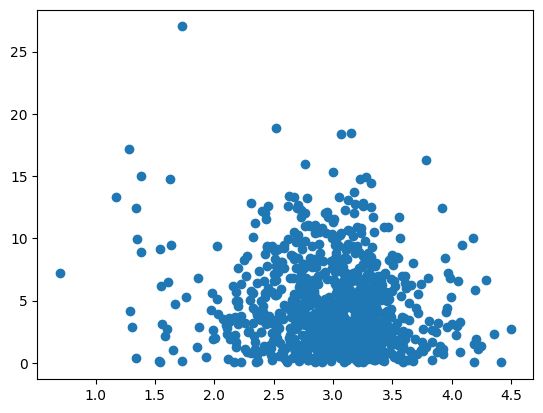

In [32]:
plt.scatter(x=concat_pyment['cnr'],y=concat_pyment['Absolute_Error'])

plt.scatter(x=concat_pyment)